# Analysis on the Cold Gas Efficiency (CGE), Carbon Conversion Efficiency (CCE), and Syngas LHV prediction performance of ML model

In [30]:
# Fix sys path to root directory so locally defined packages can be found
import sys
sys.path.append('C:\\Users\\2270577A\\PycharmProjects\\PhD_LCA_TEA')  # fix path so I can import local functions etc.

In [31]:
import pickle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from config import settings
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from functions.general.utility import fetch_ML_inputs
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from functions.general import calculate_syngas_LHV, calculate_LHV_HHV_feedstock, calculate_carbon_conversion_efficiency, calculate_cold_gas_efficiency
from functions.general import make_gasification_mock_data
from models.prediction_model import make_predictions


In [32]:
# Create mock data and do some calculations

simulations_runs = 1000

mock_data = []
predictions = []
LHV_calculated = []
LHV_pred = []
LHV_feed = []
CCE = []
CGE = []

for count in range(simulations_runs):
    # Mock data and predictions
    mock_data.append(make_gasification_mock_data())
    predictions.append(make_predictions(data=mock_data[count]))

    # LHV syngas comparison
    syngas_LHV = calculate_syngas_LHV(predictions[count])
    LHV_calculated.append(syngas_LHV["Calculated LHV"])
    LHV_pred.append(syngas_LHV["ML predicted LHV"])

    # LHV feedstock
    LHV_feed.append(calculate_LHV_HHV_feedstock(predictor_data=mock_data[count]))

    # CGE and CCE
    CGE.append(calculate_cold_gas_efficiency(syngas_LHV=syngas_LHV["ML predicted LHV"],
                                             syngas_yield=predictions[count]["Gas yield [Nm3/kg wb]"],
                                             feedstock_LHV=LHV_feed[count]))
    CCE.append(calculate_carbon_conversion_efficiency(predictor_data=mock_data[count],
                                                      predictions=predictions[count]))


In [33]:
LHV_error = {"MAPE LHV":mean_absolute_percentage_error(LHV_calculated, LHV_pred),
             "RMSE LHV": mean_squared_error(LHV_calculated, LHV_pred, squared=False)}

print("Syngas LHV errors:", LHV_error)

Syngas LHV errors: {'MAPE LHV': 0.1291945950004149, 'RMSE LHV': 1.101859668717791}


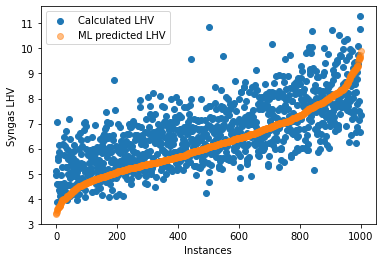

In [37]:
plt.figure()
sorted_indices = np.array(LHV_pred).argsort()
scatter_calculated_LHV = plt.scatter(x=np.arange(simulations_runs), y=np.array(LHV_calculated)[sorted_indices])
scatter_predicted_LHV = plt.scatter(x=np.arange(simulations_runs), y=np.array(LHV_pred)[sorted_indices], alpha=0.5)

plt.legend(["Calculated LHV", "ML predicted LHV"])
plt.xlabel("Instances")
plt.ylabel("Syngas LHV")
plt.show()

# TODO: Could run this same analysis on ML test data - how does calculated LHV compare to ML model's prediction.

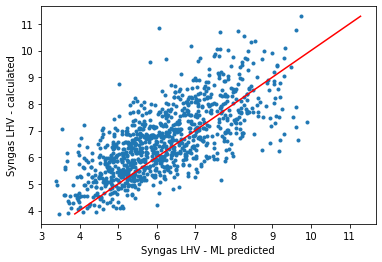

In [46]:
plt.figure()
sorted_indices = np.array(LHV_pred).argsort()
scatter_calculated_LHV = plt.scatter(x=np.array(LHV_pred), y=np.array(LHV_calculated), marker=".")
perfect_fit_array = [min(LHV_calculated), max(LHV_calculated)]
perfect_line = plt.plot(perfect_fit_array,perfect_fit_array, color="red")
plt.xlabel("Syngas LHV - ML predicted")
plt.ylabel("Syngas LHV - calculated")
plt.show()


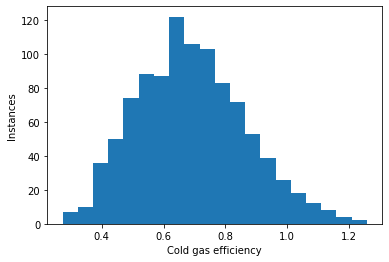

In [35]:
plt.figure()
histogram = plt.hist(CGE,bins=20)
plt.xlabel("Cold gas efficiency")
plt.ylabel("Instances")
plt.show()

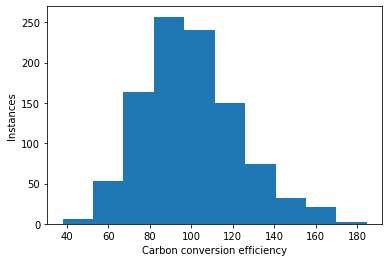

In [36]:
plt.figure()
histogram = plt.hist(CCE)
plt.xlabel("Carbon conversion efficiency")
plt.ylabel("Instances")
plt.show()